<a href="https://colab.research.google.com/github/giuliovv/ANNDL_competition_1/blob/master/toma_models/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

colab = "True" #@param ['True','False']
if colab == "True":
  from google.colab import drive
  drive.mount('/gdrive')
  %cd /gdrive/MyDrive/Colab Notebooks/
  if not os.path.isdir('training'):
    !unzip dataset.zip

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks


In [3]:
%ls

'1) FeedForwardNeuralNetwork.ipynb'
'4) Data Loader & Data Augmentation - Tensorboard (Skeleton).ipynb'
 dataset.zip
 duckie_baseline3_torch2.ipynb
 duckie_baseline3_torch.ipynb
'Duckietown models'/
 picture.jpg
'PPO_duckie_baseline3_drive_clean (1).ipynb'
 PPO_duckie_baseline3_drive_clean.ipynb
 PPO_duckie_baseline3_multiple_maps_drive.ipynb
 PPO_duckie_baseline3_multiple_maps.ipynb
'Tensorboard (1).ipynb'
 Tensorboard.ipynb
 training/
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled8.ipynb
 Untitled9.ipynb
 winequality.csv
 X.npy
 y.npy


In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
dataset_dir = 'training'

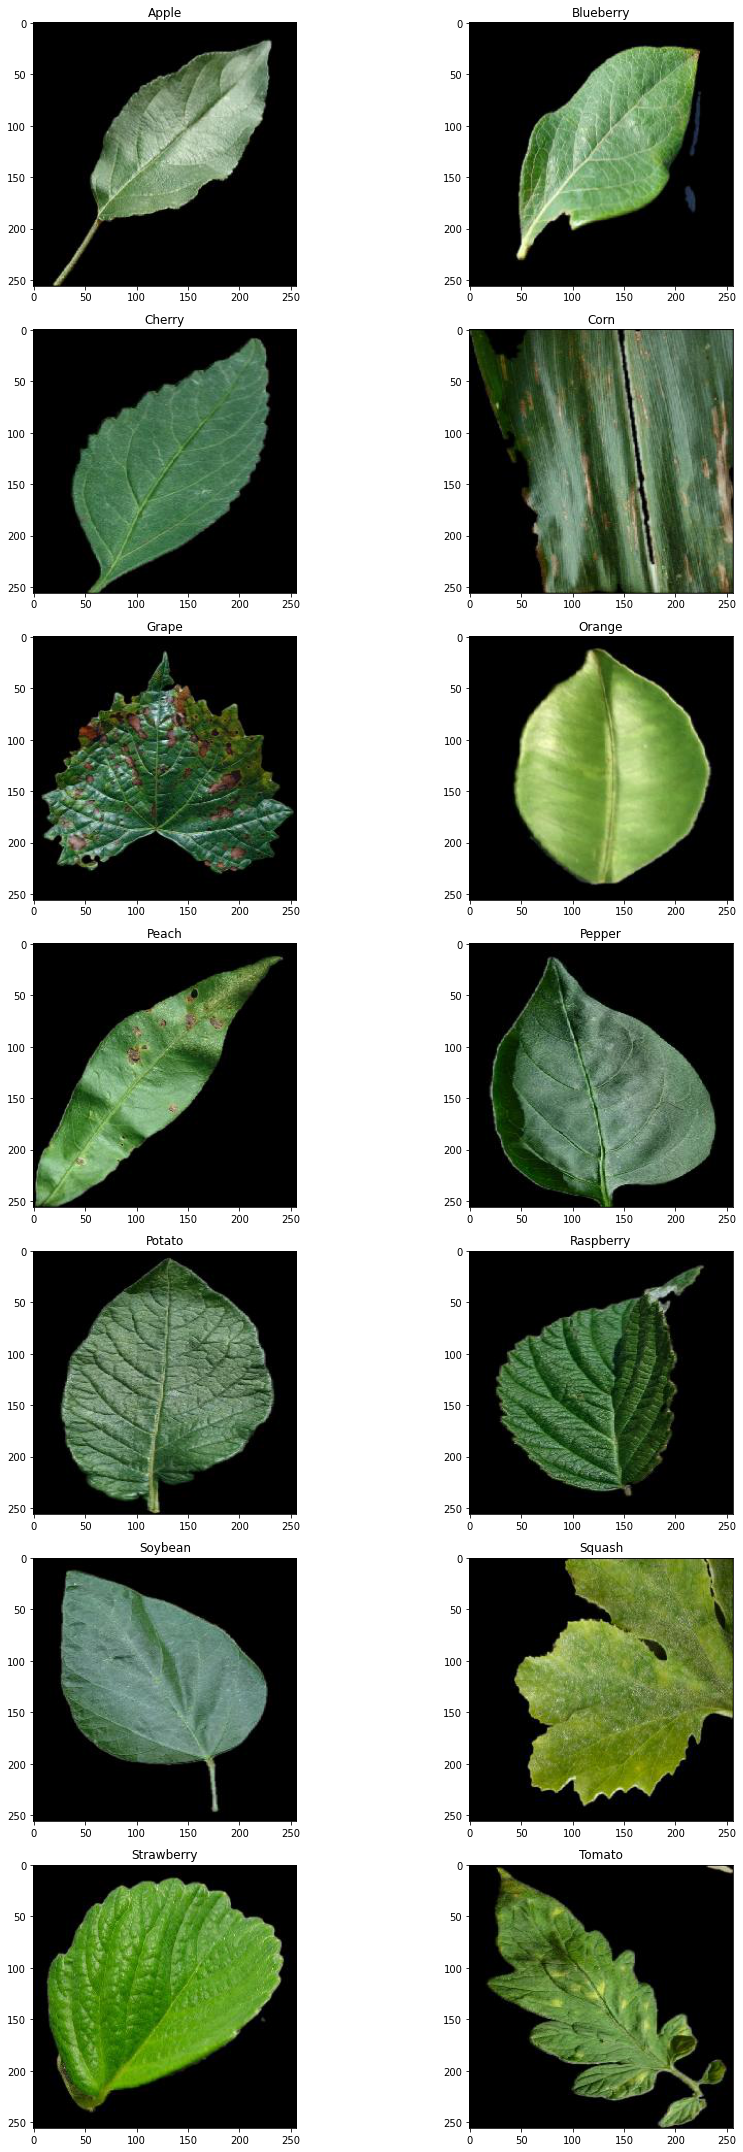

In [6]:
# Plot example images from dataset
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

num_row = len(labels)//2
num_col = len(labels)//num_row
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,15*num_col))
for i in range(len(labels)):
  if i < len(labels):
    class_imgs = next(os.walk('{}/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

Let the game begin

In [7]:
import tensorflow as tf

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = tf.keras.utils.to_categorical(range(len(labels)))
y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [10]:
# I forgot to convert to RGB but no errors where thown so maybe it's already RGB?
if not "X.npy" in os.listdir():
  import cv2
  X_data = []
  y_data = []
  for i, label in enumerate(labels):
    print(label)
    for pic in os.listdir("training/"+label):
      img = np.array(Image.open('{}/{}/{}'.format(dataset_dir, label, pic)))
      # There are 2 samples with double resolution
      if img.shape != (256, 256, 3):
        # There is one sample entirely black
        if img.shape == (256, 256):
          continue 
        img = cv2.resize(img, (256, 256))
      X_data.append(img)
      y_data.append(y[i])
  print("Ok, saving...")
  X = np.array(X_data)
  y = np.array(y_data)
  with open("X.npy", "wb") as f:
    np.save(f, X)
  with open("y.npy", "wb") as f:
    np.save(f, y)
else:
  print("Loading X...")
  X = np.load("X.npy", allow_pickle=True)
  print("Loading y...")
  y = np.load("y.npy", allow_pickle=True)

Loading X...
Loading y...


In [15]:
X[0].shape
tf.keras.applications.vgg16.preprocess_input
labels

['Apple',
 'Blueberry',
 'Cherry',
 'Corn',
 'Grape',
 'Orange',
 'Peach',
 'Pepper',
 'Potato',
 'Raspberry',
 'Soybean',
 'Squash',
 'Strawberry',
 'Tomato']

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import vgg16
## couldn't import preprocess_input, but it looks like it's already imported with tf
##from tensorflow.keras.applications import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential, optimizers

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [16]:
BATCH_SIZE = 64
VALIDATE_BATCH_SIZE = BATCH_SIZE / 4

train_generator = ImageDataGenerator(
## when rotating some pixels remain unfilled, to fill them the default function is to take the "nearest pixel color", this maybe screws up the learning process so I left it for later training
##                                     rotation_range=90,
                                     width_shift_range=0.1, 
                                     height_shift_range=0.1,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     preprocessing_function=tf.keras.applications.vgg16.preprocess_input) # VGG16 preprocessing

In [ ]:
train_data_flow = train_generator.flow(X_train, y_train,
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        seed=42)
validate_data_flow = train_generator.flow(X_val, y_val,
                                        batch_size=VALIDATE_BATCH_SIZE, 
                                        shuffle=True,
                                        seed=42)

In [ ]:
# function to create the whole model, including the pre-trained layer and the fully connected layers
# the default shape for vgg16 is (224,224,3) ours is (256,256,3) so we have to set it when calling the function
def create_model(input_shape=(224,224,3), n_classes, optimizer):

  # create the pre-trained layer
  vgg = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
  
  ## make all the conv layers non-trainable
  for layer in vgg.layers:
    layer.trainable = False

  ## building the network layer by layer
  ## I added two dense and one dropout layer to create the fully connected part (we can play with the number of neurons in each layer)
  vgg_output = vgg.output
  flatten = Flatten(name="flatten")(vgg_output)
  dense1 = Dense(256, activation='relu')(flatten)
  dense2 = Dense(61, activation='relu')(dense1)
  dropout = Dropout(0.2)(dense2)
  output_layer = Dense(n_classes, activation='softmax')(dropout)
  
  model = Model(inputs=vgg.input, outputs=output_layer)

  model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  
  return model

In [ ]:
# create the model
input_shape = X_train.shape
n_classes = len(labels)
adam_optimizer = Adam(learning_rate=0.001)

model = create_model(input_shape, n_classes, adam_optimizer)

# if we want we can add early stopping and model checkpoint to save the best weights of the model

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# train the model on the new data
model.fit(X_train, y_train, epochs=1, batch_size=8, validation_data=(X_val, y_val))

history = model.fit(traingen,
                    batch_size=BATCH_SIZE,
                    epochs=n_epochs,
                    validation_data=validgen,
                    steps_per_epoch=n_steps,
                    validation_steps=n_val_steps,
                    verbose=1)

1337/1337 [==============================] - 2729s 2s/step - loss: 3.9604 - val_loss: 1.2365
